# Segmentación de clientes, potenciales, a través de Kmeans Clustering

## Equipo de trabajo

1. Miriam Díaz Rodríguez
2. Marisol Flores Guerrero
3. Noé Salvador Hernández González
4. José Antonio Aviña Méndez 



# Tipos de algoritmos para clustering

1. **Centroid-based** (Kmeans)
2. **Density-based**
3. **Distribution-based**
4. **Hierarchical-based**


## Algoritmo Kmeans

+ Kmeans es un algoritmo, no paramétrico, para clusterización de datos. 
+ Dado un conjunto de observaciones $\mathbf{X}=\{x_1, x_2, \ldots, x_n\ | \ \forall_{i=1\ldots n}, x_i \in \mathbb{R}\}$, entonces el algoritmo **Kmeans** agrupa las observaciones en un conjunto, $\mathcal{S}$, de clústers donde $\mathcal{S} = \{s_1, s_2, \ldots, s_k \}$ 
+ Adopta un enfoque de aprendizaje no supervisado.

+ El proceso de agrupamiento se basa esencialmente en el cálculo de las distancias -por ejemplo- euclidianas entre un conjunto de *observaciones*, $\mathbf{x}$, y su respectivo *centroide* $\boldsymbol{\mu}_i$:

$$
\Large{\sum_{\mathbf{x} \in S_i}\left\|\mathbf{x}-\boldsymbol{\mu}_i\right\|^2}
$$

+ Kmeans inicializa de manera aleatoria el conjunto de centroides para posteriormente ajustarlos con base precisamente en la media, $\mu_i$, de las distancias -geométricas- previamente calculadas
+ La optimización del número de clústers se realiza a través de un proceso -iterativo- que minimiza la *distancia total*. Esta distancia consiste en la suma de las distancias totales, en cada clúster, entre las observaciones y su respectivo centroide: 

$$
\Large{
\underset{\mathbf{S}}{\arg \min } \sum_{i=1}^k \sum_{\mathbf{x} \in S_i}\left\|\mathbf{x}-\boldsymbol{\mu}_i\right\|^2}
$$

donde: 

+ $\mathbf{S}$ es el conjunto de clústers
+ $k$ es el número de clústers
+ $\mathbf{x}$ representa las obervaciones en el clúster $S_i$, tal que $\mathbf{x} = \{x_1, x_2, \ldots x_j\}$ $\wedge$ $\forall_{i=1\ldots k} \ S_i \in \mathbf{S}$
+ $\boldsymbol{\mu}_i$ es el centroide en clúster $S_i$
+ $\left\|\mathbf{x}-\boldsymbol{\mu}_i\right\|^2$ es la distancia euclidiana entre la observaciones $\mathbf{x}$ y su respectivo centroide $\boldsymbol{\mu}_i$ en el clúster $S_i$


### Kmeans en acción

![Alt text](https://miro.medium.com/max/1400/1*LLwUlE9lVUQPhXpvrkz23g.gif)
Fig 1: Proceso iterativo de clusterización de obsevaciones o datos. 



# DataSet
El conjunto de datos se obtuvo de Kaggle y se describe a continuación:

In [138]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

data = pd.read_csv('clientes.csv', low_memory=False)
data.drop_duplicates(inplace=True)
print(data)


     Cliente  Genero  Edad  Ingreso  Gasto  cluster
0          1    Male    19       15     39      0.0
1          2    Male    21       15     81      0.0
2          3  Female    20       16      6      0.0
3          4  Female    23       16     77      1.0
4          5  Female    31       17     40      1.0
..       ...     ...   ...      ...    ...      ...
195      196  Female    35      120     79      1.0
196      197  Female    45      126     28      1.0
197      198    Male    32      126     74      1.0
198      199    Male    32      137     18      1.0
199      200    Male    30      137     83      1.0

[200 rows x 6 columns]


## Scatter Plot

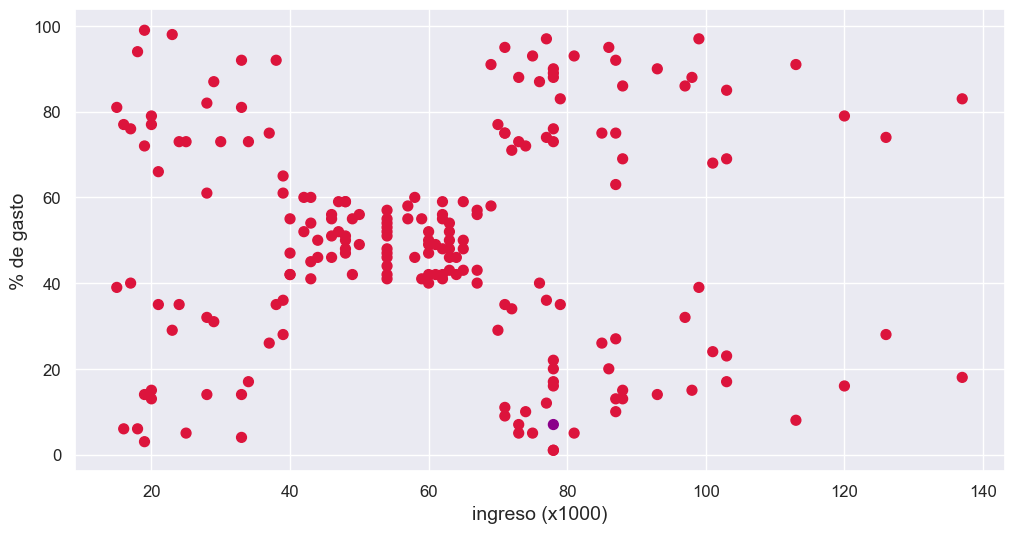

In [139]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

def show_scatterplot():
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.scatter(x=dataset['Ingreso'], y=dataset['Gasto'], s=50,
            c=dataset['cluster'].astype('category'), 
            cmap = customcmap)
    ax.set_xlabel(r'ingreso (x1000)', fontsize=14)
    ax.set_ylabel(r'% de gasto', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
show_scatterplot()

# Segmentación de  clientes en función a ingresos y  gastos 

## Segmentando clientes en tres clústers
El criterio para inicializar el número de clúster es arbitrario (i.e. no determinístico).


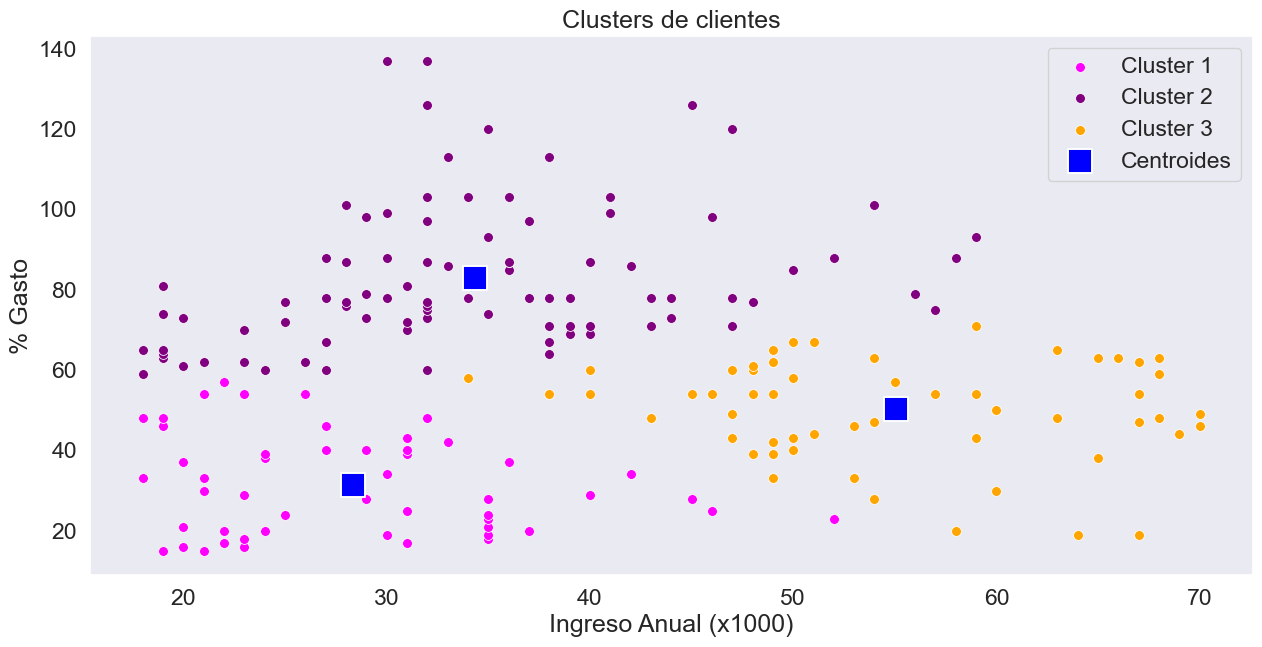

In [141]:
observations = dataset.iloc[:, [2, 3]].values

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(observations)


plt.figure(figsize=(15,7))
sns.scatterplot(observations[y_kmeans == 0, 0], observations[y_kmeans == 0, 1], color = 'magenta', label = 'Cluster 1',s=50)
sns.scatterplot(observations[y_kmeans == 1, 0], observations[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
sns.scatterplot(observations[y_kmeans == 2, 0], observations[y_kmeans == 2, 1], color = 'orange', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'blue', 
                label = 'Centroides',s=300,marker=',')

def plot_clusters():
    plt.grid(False)
    plt.title('Clusters de clientes')
    plt.xlabel('Ingreso Anual (x1000)')
    plt.ylabel('% Gasto')
    plt.legend()
    plt.show()

plot_clusters()

 ## Segmentando clientes en cuatro clústers
 Ahora, Incrementaremos sistemática -y arbitrariamente- el número de clústers para analizar si conseguimos una mejor segmentación de clientes. 

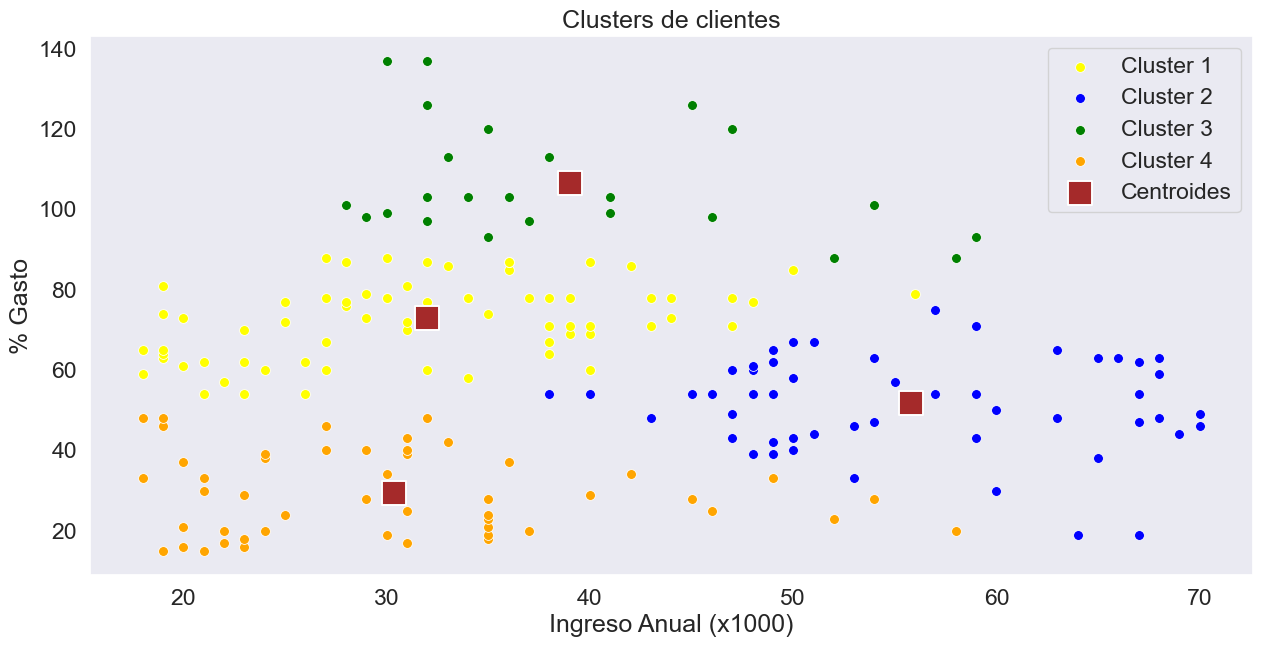

In [142]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(15,7))
sns.scatterplot(observations[y_kmeans == 0, 0], observations[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(observations[y_kmeans == 1, 0], observations[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(observations[y_kmeans == 2, 0], observations[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(observations[y_kmeans == 3, 0], observations[y_kmeans == 3, 1], color = 'orange', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'brown', 
                 label = 'Centroides',s=300,marker=',')

plot_clusters()

 ## Segmentando clientes en cinco clústers

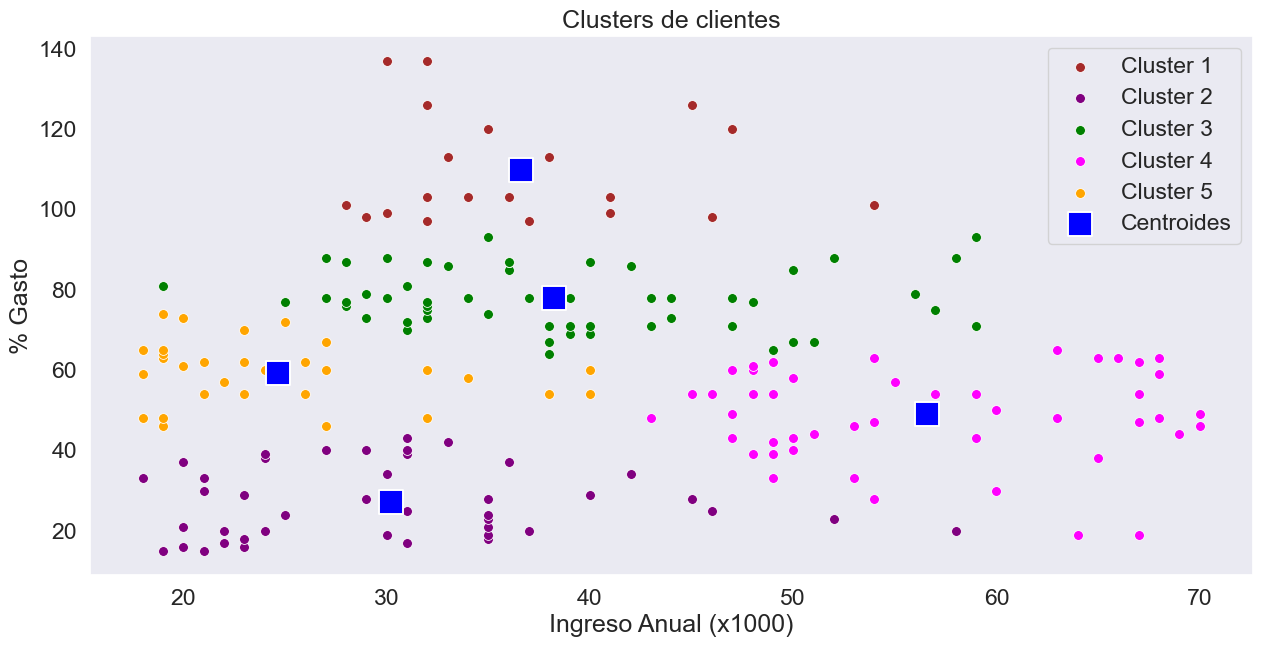

In [143]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(observations)

plt.figure(figsize=(15,7))
sns.scatterplot(observations[y_kmeans == 0, 0], observations[y_kmeans == 0, 1], color = 'brown', label = 'Cluster 1',s=50)
sns.scatterplot(observations[y_kmeans == 1, 0], observations[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
sns.scatterplot(observations[y_kmeans == 2, 0], observations[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(observations[y_kmeans == 3, 0], observations[y_kmeans == 3, 1], color = 'magenta', label = 'Cluster 4',s=50)
sns.scatterplot(observations[y_kmeans == 4, 0], observations[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'blue', 
                label = 'Centroides',s=300,marker=',')

plot_clusters()


A partir de incrementar el número de clúster podemos comprobar que se logra una mejor segmentación (i.e. clusterización) de los clientes. Este proceso se traduce entonces en un escenario de optimización que se puede resolver formalmente a través del método *Elbow*.

# Optimización a través del método Elbow

El proceso de optimización del número de clústers consiste en minimizar el valor de la variable técnicamente conocida como *Within-Cluster Sum of Square* (i.e. suma cuadrática en el clúster) previamente analizada:

$$
\Large{
\underset{\mathbf{S}}{\arg \min } \sum_{i=1}^k \sum_{\mathbf{x} \in S_i}\left\|\mathbf{x}-\boldsymbol{\mu}_i\right\|^2}
$$

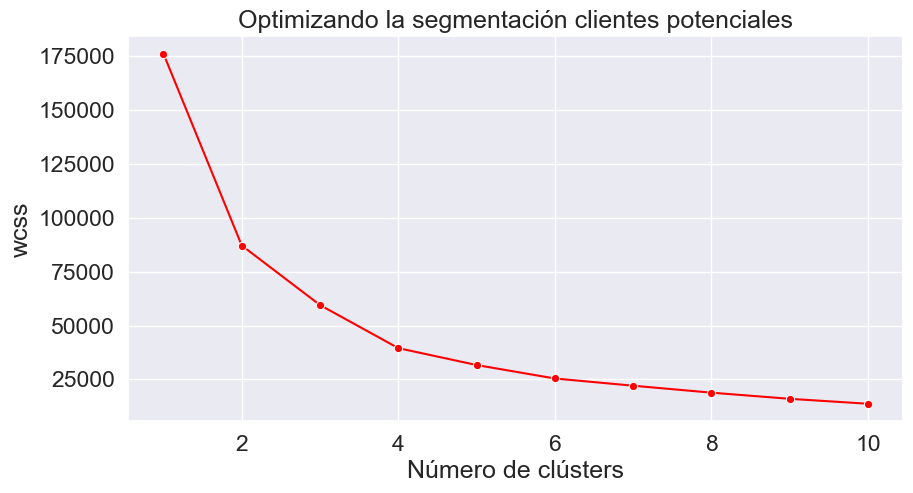

In [146]:
def cluster_optimization(obs, rand):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = rand)
        kmeans.fit(obs)
        wcss.append(kmeans.inertia_)
        
def plot_elbow():
    plt.figure(figsize=(10,5))
    sns.lineplot(range(1, 11), wcss,marker='o',color='red')
    plt.title('Optimizando la segmentación clientes potenciales')
    plt.xlabel('Número de clústers')
    plt.ylabel('wcss')
    plt.show()

cluster_optimization(observations, 90)
plot_elbow()


De acuerdo al método **Elbow** el número óptimo de clústers es $10$. Ello implica que a partir de dicho número el valor de *WCSS* ya no decrece prácticamente: 

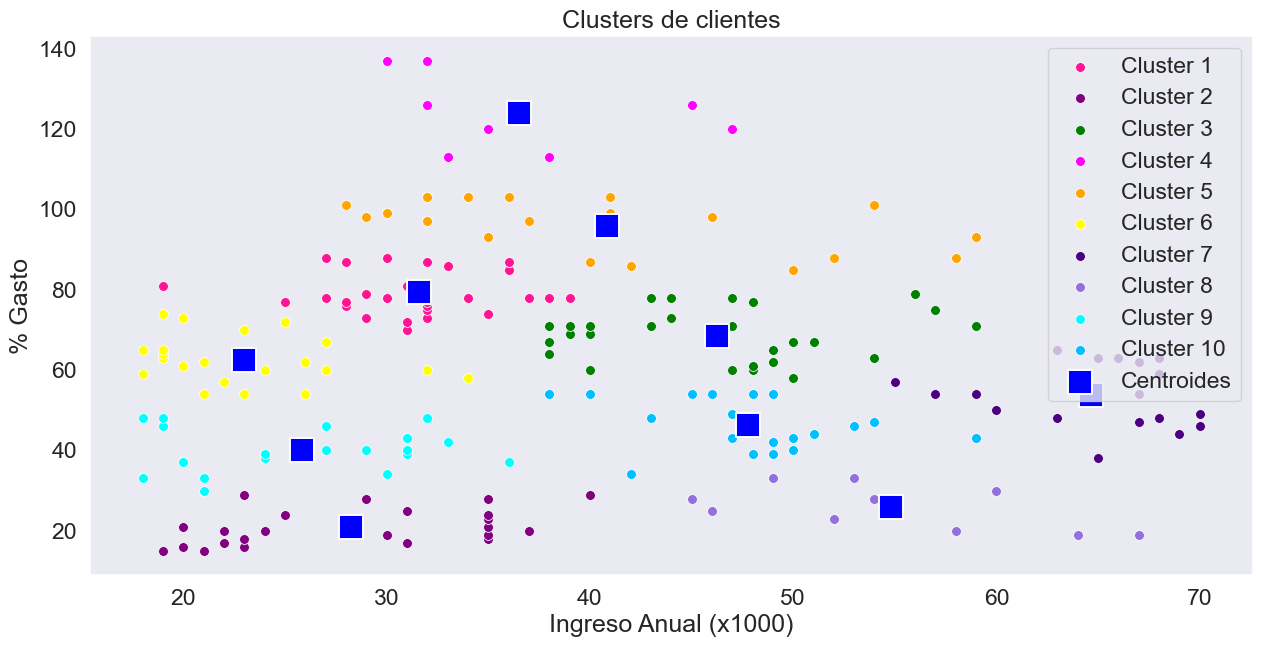

In [147]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(observations)

plt.figure(figsize=(15,7))
sns.scatterplot(observations[y_kmeans == 0, 0], observations[y_kmeans == 0, 1], color = 'deeppink', label = 'Cluster 1',s=50)
sns.scatterplot(observations[y_kmeans == 1, 0], observations[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
sns.scatterplot(observations[y_kmeans == 2, 0], observations[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(observations[y_kmeans == 3, 0], observations[y_kmeans == 3, 1], color = 'magenta', label = 'Cluster 4',s=50)
sns.scatterplot(observations[y_kmeans == 4, 0], observations[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(observations[y_kmeans == 5, 0], observations[y_kmeans == 5, 1], color = 'yellow', label = 'Cluster 6',s=50)
sns.scatterplot(observations[y_kmeans == 6, 0], observations[y_kmeans == 6, 1], color = 'indigo', label = 'Cluster 7',s=50)
sns.scatterplot(observations[y_kmeans == 7, 0], observations[y_kmeans == 7, 1], color = 'mediumpurple', label = 'Cluster 8',s=50)
sns.scatterplot(observations[y_kmeans == 8, 0], observations[y_kmeans == 8, 1], color = 'cyan', label = 'Cluster 9',s=50)
sns.scatterplot(observations[y_kmeans == 9, 0], observations[y_kmeans == 9, 1], color = 'deepskyblue', label = 'Cluster 10',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'b', 
                label = 'Centroides',s=300,marker=',')

plot_clusters()

# Interpretación de lo resultados y áreas de aplicación 

De acuerdo a los ingresos y porcentaje de gastos, de los clientes -potenciales- en el dataset analizado, éstos se pueden segmentar en 10 diferentes grupos -económicos- sobre los cuales se pueden aplicar diferentes estrategias comerciales y/o apoyos financieros.  

## Creación de Fintechs



![](fintech.jpg)
Fig. 2: La tecnología que está cambiando los paradigmas comercial y bancario. Tomada de https://enzyme.biz/blog/fintech-app


Este tipo de análisis puede servir de soporte para la creación de una Fintech para brindar -por ejemplo- créditos en función al grupo económico. Las Fintech en este rubro ha proliferado en los úlitmos cinco años. 